## Importing Needed packages

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline


<h2 id="understanding_data">Understanding the Data</h2>

### `FuelConsumption.csv`:
We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2023
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. COMPACT
- **ENGINE SIZE** e.g. 2.4
- **CYLINDERS** e.g 4
- **TRANSMISSION** e.g. AM8
- **FUEL TYPE** e.g. X
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 7
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 8.6
- **FUEL CONSUMPTION COMB (mpg)** e.g. 33
- **CO2 EMISSIONS (g/km)** e.g. 200   --> low --> 0
- **CO2 RATING** e.g. 6
- **SMOG RATING** e.g. 3


<h2 id="reading_data">Reading the data in</h2>

In [16]:
df = pd.read_csv('MY2022_Fuel_ConsumptionCo2.csv')

# take a look at the dataset
df.head()

,MODEL_YEAR,MAKE,MODEL,VEHICLE_CLASS,ENGINE_SIZE,CYLINDERS,TRANSMISSION,FUEL_TYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2_EMISSIONS,CO2_RATING,SMOG_RATING
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,MDX Type S,SUV: Standard,3.0,6,AS10,Z,13.8,11.2,12.4,23,291,4,5
3,2022,Acura,NSX,Two-seater,3.5,6,AM9,Z,11.1,10.8,11.0,26,256,5,3
4,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6


<h2 id="data_exploration">Data Exploration</h2>
Lets first have a descriptive exploration on our data.

In [17]:
# summarize the data
df.describe()

,MODEL_YEAR,ENGINE_SIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2_EMISSIONS,CO2_RATING,SMOG_RATING
count,976.0,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000
mean,2022.0,3.201742,5.691598,12.561373,9.413217,11.144672,27.112705,260.439549,4.512295,4.965164
std,0.0,1.364918,1.935411,3.449886,2.305756,2.882519,7.639681,64.694076,1.473824,1.676631
min,2022.0,1.200000,3.000000,4.000000,3.900000,4.000000,11.000000,94.000000,1.000000,1.000000
25%,2022.0,2.000000,4.000000,10.300000,7.700000,9.100000,22.000000,214.000000,3.000000,3.000000
50%,2022.0,3.000000,6.000000,12.300000,9.200000,10.900000,26.000000,258.000000,4.000000,5.000000
75%,2022.0,4.000000,6.000000,14.700000,10.700000,13.000000,31.000000,302.250000,5.000000,6.000000
max,2022.0,8.000000,16.000000,30.300000,20.900000,26.100000,71.000000,608.000000,10.000000,7.000000


Lets select some features to explore more.

In [18]:
cdf = df[['ENGINE_SIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2_EMISSIONS']]
cdf.head(9)

,ENGINE_SIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2_EMISSIONS
0,2.4,4,8.6,200
1,3.5,6,11.2,263
2,3.0,6,12.4,291
3,3.5,6,11.0,256
4,2.0,4,9.9,232
5,2.0,4,10.3,242
6,2.0,4,9.8,230
7,2.0,4,9.8,231
8,3.0,6,11.0,256


we can plot each of these features:

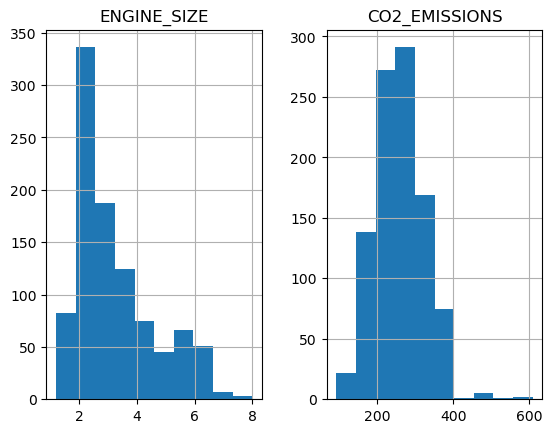

In [19]:
viz = cdf[['ENGINE_SIZE','CO2_EMISSIONS']]
viz.hist()
plt.show()

Now, lets plot each of these features vs the Emission, to see how linear is their relation:

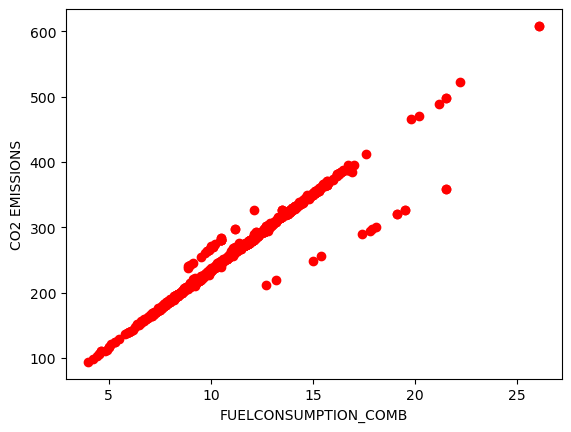

In [20]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2_EMISSIONS,  color='red')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2 EMISSIONS")
plt.show()

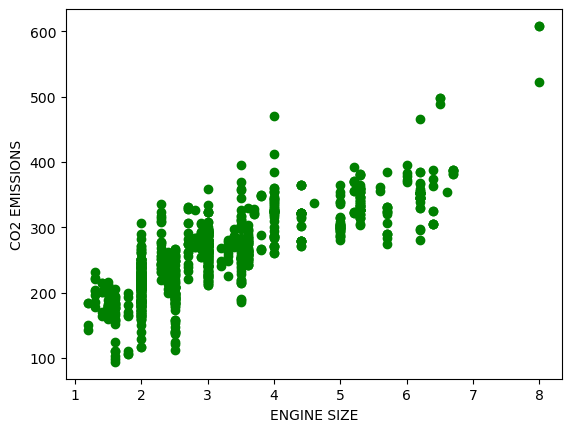

In [21]:
plt.scatter(cdf.ENGINE_SIZE, cdf.CO2_EMISSIONS,  color='green')
plt.xlabel("ENGINE SIZE")
plt.ylabel("CO2 EMISSIONS")
plt.show()

Plot CYLINDERs vs the Emission, to see how linear is their relation:

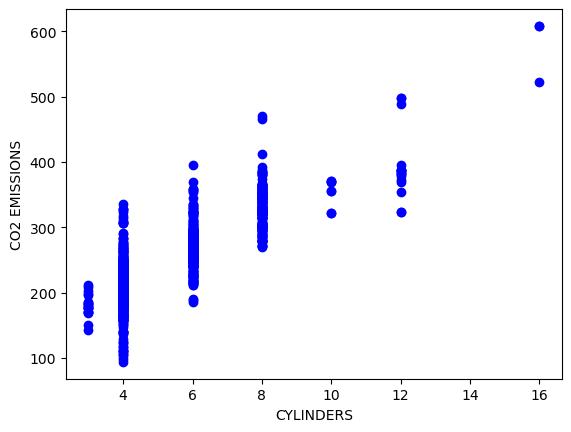

In [22]:
plt.scatter(cdf.CYLINDERS, cdf.CO2_EMISSIONS, color='blue')
plt.xlabel("CYLINDERS")
plt.ylabel("CO2 EMISSIONS")
plt.show()

#### Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that we know the outcome of each data point in this dataset, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Lets split our dataset into train and test sets, 80% of the entire data for training, and the 20% for testing. We create a mask to select random rows using __np.random.rand()__ function: 

In [23]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

<h2 id="simple_regression">Simple Regression Model</h2>
Linear Regression fits a linear model with coefficients $\theta = (\theta_1, ..., \theta_n)$ to minimize the 'residual sum of squares' between the independent x in the dataset, and the dependent y by the linear approximation Simple linear regression is a statistical method that analyzes the relationship between two continuous variables, typically represented as a straight line, to predict one variable based on the other. It aims to find the best-fitting line that minimizes the sum of squared differences between observed and predicted values. 

#### Train data distribution

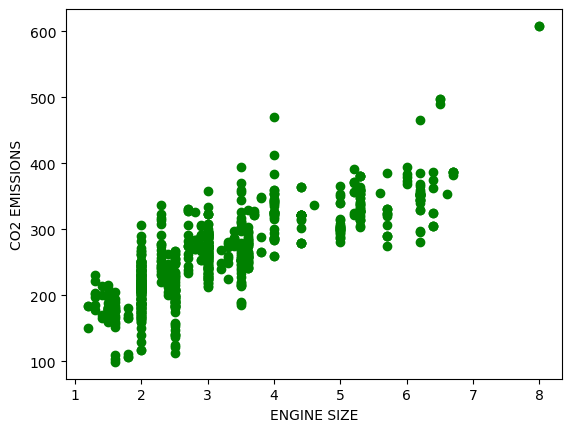

In [24]:
plt.scatter(train.ENGINE_SIZE, train.CO2_EMISSIONS,  color='green')
plt.xlabel("ENGINE SIZE")
plt.ylabel("CO2 EMISSIONS")
plt.show()

## Modeling
Using sklearn package to model data.

In [25]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINE_SIZE']])
train_y = np.asanyarray(train[['CO2_EMISSIONS']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.01636019]]
Intercept:  [136.44866403]


As mentioned before, __Coefficient__ and __Intercept__ in the simple linear regression, are the parameters of the fit line. 
Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data. 
Notice that all of the data must be available to traverse and calculate the parameters.


## Plot Output

we can plot the fit line over the data:

Text(0, 0.5, 'CO2 EMISSIONS')

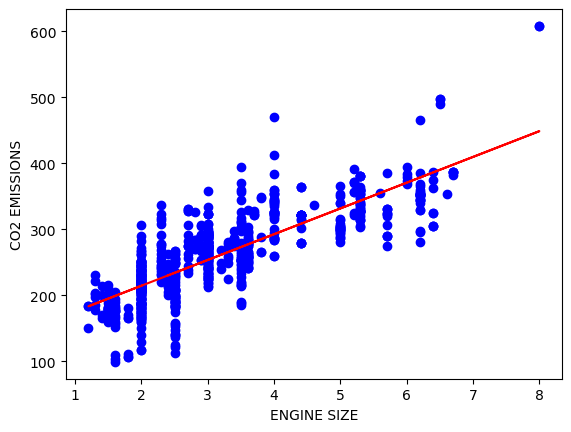

In [26]:
plt.scatter(train.ENGINE_SIZE, train.CO2_EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], 'red')
plt.xlabel("ENGINE SIZE")
plt.ylabel("CO2 EMISSIONS")

#### Evaluation
we compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set: 
<ul>
    <li> Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.</li>
    <li> Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.</li>
    <li> Root Mean Squared Error (RMSE): This is the square root of the Mean Square Error. </li>
    <li> R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).</li>
</ul>

In [27]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINE_SIZE']])
test_y = np.asanyarray(test[['CO2_EMISSIONS']])
pred_y = regr.predict(test_x)

mse = np.mean((pred_y - test_y) ** 2)

# Calculate the range of CO2 emissions
co2_emissions_range = df['CO2_EMISSIONS'].max() - df['CO2_EMISSIONS'].min()

print(co2_emissions_range)

normalized_mse = mse / co2_emissions_range

print("Mean absolute error: %.2f" % np.mean(np.absolute(pred_y - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((pred_y - test_y) ** 2))
print(f'Normalized MSE: {normalized_mse}')
print("R2-score: %.2f" % r2_score(pred_y , test_y) )

514
Mean absolute error: 25.77
Residual sum of squares (MSE): 1041.60
Normalized MSE: 2.0264586982014965
R2-score: 0.66


In [14]:
r2 = r2_score(pred_y, test_y)

# Convert R-squared to percentage
accuracy_percentage = r2 * 100

print('Accuracy (R-squared): {:.2f}%'.format(accuracy_percentage))


Accuracy (R-squared): 57.78%


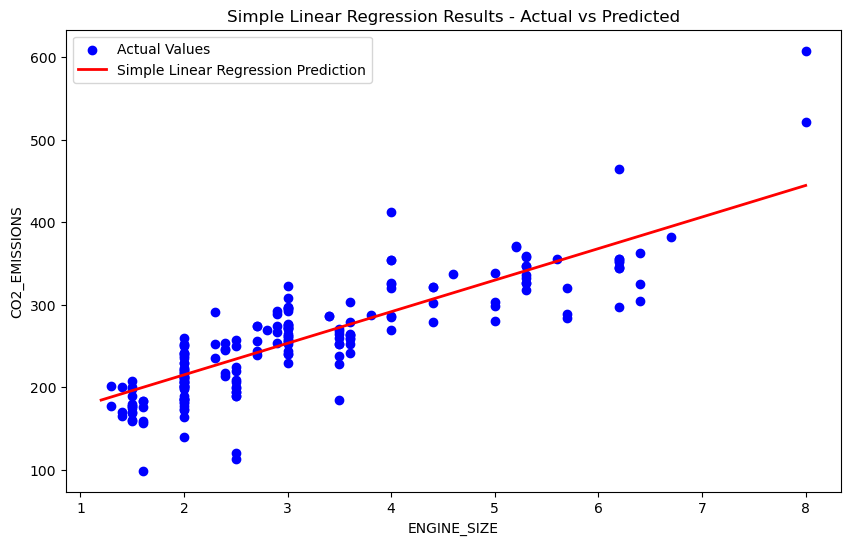

In [61]:
# Generate a range of values for ENGINE_SIZE
engine_size_range = np.linspace(min(df['ENGINE_SIZE']), max(df['ENGINE_SIZE']), 100).reshape(-1, 1)

# Create a grid of values for prediction
grid_values = engine_size_range

# Make predictions on the grid
predicted_values = regr.predict(grid_values)

# Plot the actual versus predicted values
plt.figure(figsize=(10, 6))

# Scatter plot of actual values
plt.scatter(test_x[:, 0], test_y, color='blue', label='Actual Values')

# Line plot of predicted values
plt.plot(grid_values, predicted_values, color='red', linewidth=2, label='Simple Linear Regression Prediction')

plt.title('Simple Linear Regression Results - Actual vs Predicted')
plt.xlabel('ENGINE_SIZE')
plt.ylabel('CO2_EMISSIONS')
plt.legend()
plt.show()
